# Make a figure with all elemental channels and masks


In [1]:
import beamtime_config_2022
from beamtime_config_2022 import *

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from matplotlib import rc
from matplotlib.widgets import LassoSelector
from matplotlib.path import Path
import seaborn as sns

import xrf_roif_2022

from xrf_roif_2022 import *

import xrfm_batches
from xrfm_batches import *

import fuzzy_kmeans_engine
from fuzzy_kmeans_engine import _format_soft_km_axes, soft_clustering_weights

from skimage.filters import sobel

%matplotlib inline

In [15]:
def binary_overlay(idx):

    img=coarse_scans.X_d_K[idx]+coarse_scans.X_d_P[idx]+coarse_scans.X_d_S[idx]+coarse_scans.X_d_Ca[idx]
    # img=coarse_scans.X_d_P[idx]


    img_seg_mask = coarse_scans.X_binary_ero_dil[idx]
    img_normalized = (255*((img - img.min()) / (img.max() - img.min()))).astype(np.uint8)
    img_RGB = np.concatenate([img_normalized[...,np.newaxis]]*3, axis = -1)


    sobel_mag = np.sqrt(sum([sobel(img_seg_mask, axis=i)**2
                             for i in range(img_seg_mask.ndim)]) / img_seg_mask.ndim)
    img_sobel = sobel_mag
    img_sobel = (img_sobel - img_sobel.min()) / (img_sobel.max() - img_sobel.min())
    img_sobel = (255*np.round(img_sobel)).astype(np.uint8)

    img_RGB[img_sobel == 255] = [255,0,0]
    
    return img_RGB

#  import all coarse scans

In [3]:
BASE_PATCH_WIDTH=32
selected_elm_maps=['Cu','Zn','Ca', 'K', 'P', 'S','Fe','Ni','Total_Fluorescence_Yield']
noise_type='none'
base_file_path = '/data02/AZC/March_2022_XRF_Data/'


# coarse_scan_names = ['bnp_fly0032.mda.h5']


coarse_scan_names = ['bnp_fly0032.mda.h5', 
                    'bnp_fly0042.mda.h5',
                    'bnp_fly0043.mda.h5',
                    'bnp_fly0073.mda.h5',
                    'bnp_fly0082.mda.h5',
                    'bnp_fly0102.mda.h5',
                    'bnp_fly0103.mda.h5',
                    'bnp_fly0104.mda.h5']


# 'bnp_fly0050.mda.h5',
#                     'bnp_fly0051.mda.h5']



hdf5_string_list=['MAPS','MAPS','MAPS','MAPS','MAPS','MAPS','MAPS','MAPS']
norm_ch_list=['US_IC','US_IC','US_IC','US_IC','US_IC','US_IC','US_IC','US_IC']
selected_elm_maps_list=[selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps]
noise_type_list = [noise_type,noise_type,noise_type,noise_type,noise_type,noise_type,noise_type,noise_type]
# bin_conv_elm_list=['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P']
bin_conv_elm_list=['KPSCa', 'KPSCa', 'KPSCa', 'KPSCa', 'KPSCa', 'KPSCa', 'KPSCa', 'KPSCa']
apply_gausssian_list=[False, False, False, False,False,False,False,False]
value_offset_list = [1e-12,1e-12,1e-12,1e-12,1e-12,1e-12,1e-12,1e-12]

BASE_PATCH_WIDTH=32
selected_elm_maps=['Cu','Zn','Ca', 'K', 'P', 'S','Fe','Ni','Total_Fluorescence_Yield']
noise_type='none'
base_file_path = '/data02/AZC/March_2022_XRF_Data/'



coarse_scans = XRFM_batch(base_file_path,
                  coarse_scan_names,
                 hdf5_string_list,
                 norm_ch_list,
                 selected_elm_maps_list,
                 noise_type_list,
                 bin_conv_elm_list,
                 value_offset_list,
                apply_gausssian_list,
                 BASE_PATCH_WIDTH,
                 print_pv=False,  
                 verbosity=False)

print('Bounding box width and height (pixels):' , BASE_PATCH_WIDTH)
print('Total extracted cells, features:', coarse_scans.X.shape)
print('Total extracted cell, cell size:', coarse_scans.X_bin.shape)



XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0032.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(41, 14)
XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0042.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(36, 14)
XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0043.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(17, 14)
XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0073.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(19, 14)
XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0082.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(11, 14)
XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0102.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(18, 14)
XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0103.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(16, 14)
XRF /data02/AZC/March_2022_XRF_Dat

/data02/AZC/ROI-Finder/flx_workflows/xrf_roif_2022.py:106: RuntimeWarning: divide by zero encountered in true_divide
  xrfdata[e].append(xrf[chidx]/norm)
/data02/AZC/ROI-Finder/flx_workflows/xrf_roif_2022.py:106: RuntimeWarning: invalid value encountered in true_divide
  xrfdata[e].append(xrf[chidx]/norm)


# construct dataframe with all the extracted information

In [4]:
principalDf = pd.DataFrame(
             columns = ['Pixel_count', 'area'])


principalDf['area'] = coarse_scans.X[:,0]
principalDf['eccentricity'] = coarse_scans.X[:,1]
principalDf['equivalent_diameter'] = coarse_scans.X[:,2]
principalDf['major_axis_length'] = coarse_scans.X[:,3]
principalDf['minor_axis_length'] = coarse_scans.X[:,4]
principalDf['perimeter'] = coarse_scans.X[:,5]
principalDf['K'] = coarse_scans.X[:,6]
principalDf['P'] = coarse_scans.X[:,7]
principalDf['Ca'] = coarse_scans.X[:,8]
principalDf['Zn'] = coarse_scans.X[:,9]
principalDf['Fe'] = coarse_scans.X[:,10]
principalDf['Cu'] = coarse_scans.X[:,11]
principalDf['BFY'] = coarse_scans.X[:,12]
principalDf['Pixel_count'] = coarse_scans.X[:,13].astype(int)   #Pixel_count column must exist

#add res and origins to dataframe here
#convert from list
principalDf['x_res'] = coarse_scans.X_x_res
principalDf['y_res'] = coarse_scans.X_y_res
principalDf['avg_res'] = coarse_scans.X_avg_res
principalDf['x_origin'] = coarse_scans.X_x_origin
principalDf['y_origin'] = coarse_scans.X_y_origin
principalDf['x_motor'] = coarse_scans.X_x_motor
principalDf['y_motor'] = coarse_scans.X_y_motor
principalDf['xrf_file']=coarse_scans.X_xrf_track_files




#assign scan names in dataframe
number_of_cells = principalDf['xrf_file'].to_numpy().shape[0]
coarse_scan_name=[]
for idx in range(number_of_cells):

    coarse_scan_name.append(os.path.split(principalDf['xrf_file'].to_numpy()[idx])[1])
principalDf['scan_name'] =  np.array(coarse_scan_name)  


display(principalDf)

Pixel_count    area  eccentricity  equivalent_diameter  \
0              5  0.3125      0.000000             0.630783   
1             31  1.9375      0.926864             1.570637   
2              5  0.3125      0.000000             0.630783   
3             21  1.3125      0.945323             1.292721   
4             11  0.6875      0.755929             0.935603   
..           ...     ...           ...                  ...   
170           14  0.8750      0.850688             1.055502   
171           20  1.2500      0.859510             1.261566   
172           34  2.1250      0.939338             1.644881   
173           29  1.8125      0.432967             1.519127   
174           22  1.3750      0.689861             1.323142   

     major_axis_length  minor_axis_length  perimeter         K         P  \
0             0.632456           0.632456   1.414214  0.000042  0.000038   
1             2.566840           0.963588   5.242641  0.000042  0.000085   
2             0.632456           0.632456   1.414214  0.000036  0.000046   
3             2.313760           0.754599   3.828427  0.000069  0.000055   
4             1.128152           0.738549   2.414214  0.000046  0.000057   
..                 ...                ...        ...       ...       ...   
170           1.465135           0.770179   2.767767  0.000104  0.000051   
171           1.810667           0.925465   3.828427  0.000111  0.000067   
172           2.891355           0.991711   5.681981  0.000133  0.000077   
173           1.606889           1.448465   4.474874  0.000136  0.000089   
174           1.539808           1.114732   3.621320  0.000107  0.000089   

           Ca  ...       BFY  x_res     y_res   avg_res    x_origin  \
0    0.000047  ...  0.007212   0.25  0.256287  0.253143  110.674377   
1    0.000074  ...  0.007246   0.25  0.256287  0.253143  110.674377   
2    0.000051  ...  0.007115   0.25  0.256287  0.253143  110.674377   
3    0.000065  ...  0.007196   0.25  0.256287  0.253143  110.674377   
4    0.000034  ...  0.007210   0.25  0.256287  0.253143  110.674377   
..        ...  ...       ...    ...       ...       ...         ...   
170  0.000135  ...  0.000799   0.25  0.272903  0.261452  800.212036   
171  0.000038  ...  0.000813   0.25  0.272903  0.261452  800.212036   
172  0.000038  ...  0.000947   0.25  0.272903  0.261452  800.212036   
173  0.000035  ...  0.000954   0.25  0.272903  0.261452  800.212036   
174  0.000032  ...  0.000731   0.25  0.272903  0.261452  800.212036   

       y_origin     x_motor     y_motor  \
0   -661.065186  139.674377 -655.565186   
1   -661.065186  175.174377 -654.565186   
2   -661.065186  140.174377 -653.815186   
3   -661.065186  121.424377 -652.315186   
4   -661.065186  139.174377 -650.565186   
..          ...         ...         ...   
170 -155.992310  801.212036 -123.742310   
171 -155.992310  819.462036 -123.242310   
172 -155.992310  805.462036 -121.242310   
173 -155.992310  812.962036 -119.242310   
174 -155.992310  815.712036 -119.242310   

                                              xrf_file           scan_name  
0    /data02/AZC/March_2022_XRF_Data/bnp_fly0032.md...  bnp_fly0032.mda.h5  
1    /data02/AZC/March_2022_XRF_Data/bnp_fly0032.md...  bnp_fly0032.mda.h5  
2    /data02/AZC/March_2022_XRF_Data/bnp_fly0032.md...  bnp_fly0032.mda.h5  
3    /data02/AZC/March_2022_XRF_Data/bnp_fly0032.md...  bnp_fly0032.mda.h5  
4    /data02/AZC/March_2022_XRF_Data/bnp_fly0032.md...  bnp_fly0032.mda.h5  
..                                                 ...                 ...  
170  /data02/AZC/March_2022_XRF_Data/bnp_fly0104.md...  bnp_fly0104.mda.h5  
171  /data02/AZC/March_2022_XRF_Data/bnp_fly0104.md...  bnp_fly0104.mda.h5  
172  /data02/AZC/March_2022_XRF_Data/bnp_fly0104.md...  bnp_fly0104.mda.h5  
173  /data02/AZC/March_2022_XRF_Data/bnp_fly0104.md...  bnp_fly0104.mda.h5  
174  /data02/AZC/March_2022_XRF_Data/bnp_fly0104.md...  bnp_fly0104.mda.h5  

[175 rows x 23 columns]

# remove extracted cells that contain less than certain amount of pixels

In [5]:
secondaryDf=remove_artifacts(principalDf, remove_count = 8)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(secondaryDf)

# secondaryDf.head()

/data02/AZC/ROI-Finder/flx_workflows/xrf_roif_2022.py:865: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secondaryDf['original index'] = secondaryDf.index.to_numpy()


Pixel_count    area  eccentricity  equivalent_diameter  \
0             31  1.9375      0.926864             1.570637   
1             21  1.3125      0.945323             1.292721   
2             11  0.6875      0.755929             0.935603   
3             42  2.6250      0.926738             1.828183   
4             18  1.1250      0.722659             1.196827   
5             49  3.0625      0.925859             1.974664   
6             95  5.9375      0.993093             2.749520   
7             38  2.3750      0.927087             1.738949   
8             47  2.9375      0.984730             1.933944   
9             50  3.1250      0.977717             1.994711   
10           109  6.8125      0.983996             2.945156   
11            14  0.8750      0.629289             1.055502   
12            25  1.5625      0.926363             1.410474   
13            11  0.6875      0.755929             0.935603   
14            24  1.5000      0.961729             1.381977   
15            17  1.0625      0.890992             1.163107   
16            11  0.6875      0.755929             0.935603   
17            52  3.2500      0.950618             2.034214   
18           121  7.5625      0.674676             3.103043   
19            14  0.8750      0.850688             1.055502   
20            26  1.6250      0.950739             1.438407   
21            39  2.4375      0.698900             1.761681   
22            44  2.7500      0.977954             1.871205   
23            25  1.5625      0.902330             1.410474   
24            14  0.8750      0.865391             1.055502   
25            17  1.0625      0.910417             1.163107   
26            54  3.3750      0.978551             2.072965   
27            39  2.4375      0.961514             1.761681   
28            15  0.9375      0.821501             1.092548   
29            11  0.6875      0.819334             0.935603   
30            90  5.6250      0.973935             2.676186   
31            38  2.3750      0.970433             1.738949   
32            34  2.1250      0.936322             1.644881   
33            19  1.1875      0.840961             1.229623   
34            14  0.8750      0.909309             1.055502   
35            31  1.9375      0.883710             1.570637   
36            29  1.8125      0.899483             1.519127   
37            18  1.1250      0.722659             1.196827   
38            21  1.3125      0.904044             1.292721   
39            42  2.6250      0.970614             1.828183   
40            11  0.6875      0.755929             0.935603   
41            71  4.4375      0.942353             2.376973   
42            19  1.1875      0.791703             1.229623   
43            10  0.6250      0.616441             0.892062   
44            15  0.9375      0.908335             1.092548   
45            22  1.3750      0.833829             1.323142   
46            45  2.8125      0.851423             1.892349   
47            27  1.6875      0.941822             1.465808   
48            11  0.6875      0.755929             0.935603   
49            68  4.2500      0.976399             2.326213   
50            53  3.3125      0.970301             2.053681   
51            23  1.4375      0.897050             1.352879   
52            70  4.3750      0.986269             2.360174   
53            34  2.1250      0.976459             1.644881   
54            21  1.3125      0.918482             1.292721   
55            64  4.0000      0.971870             2.256758   
56            34  2.1250      0.871162             1.644881   
57            11  0.6875      0.819334             0.935603   
58            68  4.2500      0.978027             2.326213   
59            16  1.0000      0.740971             1.128379   
60            33  2.0625      0.943211             1.620511   
61            21  1.3125      0.937295             1.292721   
62            15  0.9375      0.8215

KeyError: 'text_labels'

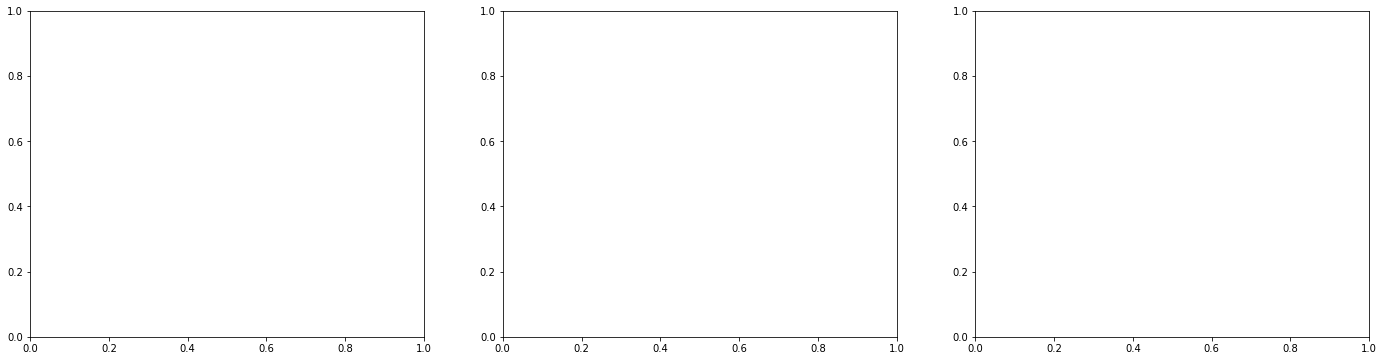

In [6]:
select_feature_channel = 'eccentricity'

# secondaryDf[secondaryDf['text_labels']==0][select_feature_channel]
%matplotlib inline

fig, ax = plt.subplots(1, 3, figsize=(24, 6))

sns.histplot(ax=ax[0],data=secondaryDf[secondaryDf['text_labels']=='Type A'], x=select_feature_channel, kde=True,color='blue')
ax[0].set_title('Type A');

sns.histplot(ax=ax[1],data=secondaryDf[secondaryDf['text_labels']=='Type B'], x=select_feature_channel, kde=True,color='orange')
ax[1].set_title('Type B');

sns.histplot(ax=ax[2],data=secondaryDf[secondaryDf['text_labels']=='Type C'], x=select_feature_channel, kde=True,color='green')
ax[2].set_title('Type C');



# make figures here

type A - blue, type B- orange, type C - green

In [ ]:
scan_idx = 0

CMAP = 'Blues_r'
inplot_text_xloc=5
inplot_text_yloc=290
inplot_text_fontsize = 22
inplot_text_color = 'white'



fig, ax = plt.subplots(1,2,figsize=(16,4), dpi=150)

img_K=ax[0].contourf(coarse_scans.X_d_K[scan_idx], cmap = CMAP)
# # ax.set_title('K')
# # ax.invert_yaxis()
cax_K = fig.add_axes()
fig.colorbar(img_K, cax = cax_K, orientation='horizontal')
# ax[0].colorbar(img, orientation='vertical')

plt.text(inplot_text_xloc, inplot_text_yloc, 'K', fontsize = inplot_text_fontsize, color = inplot_text_color)


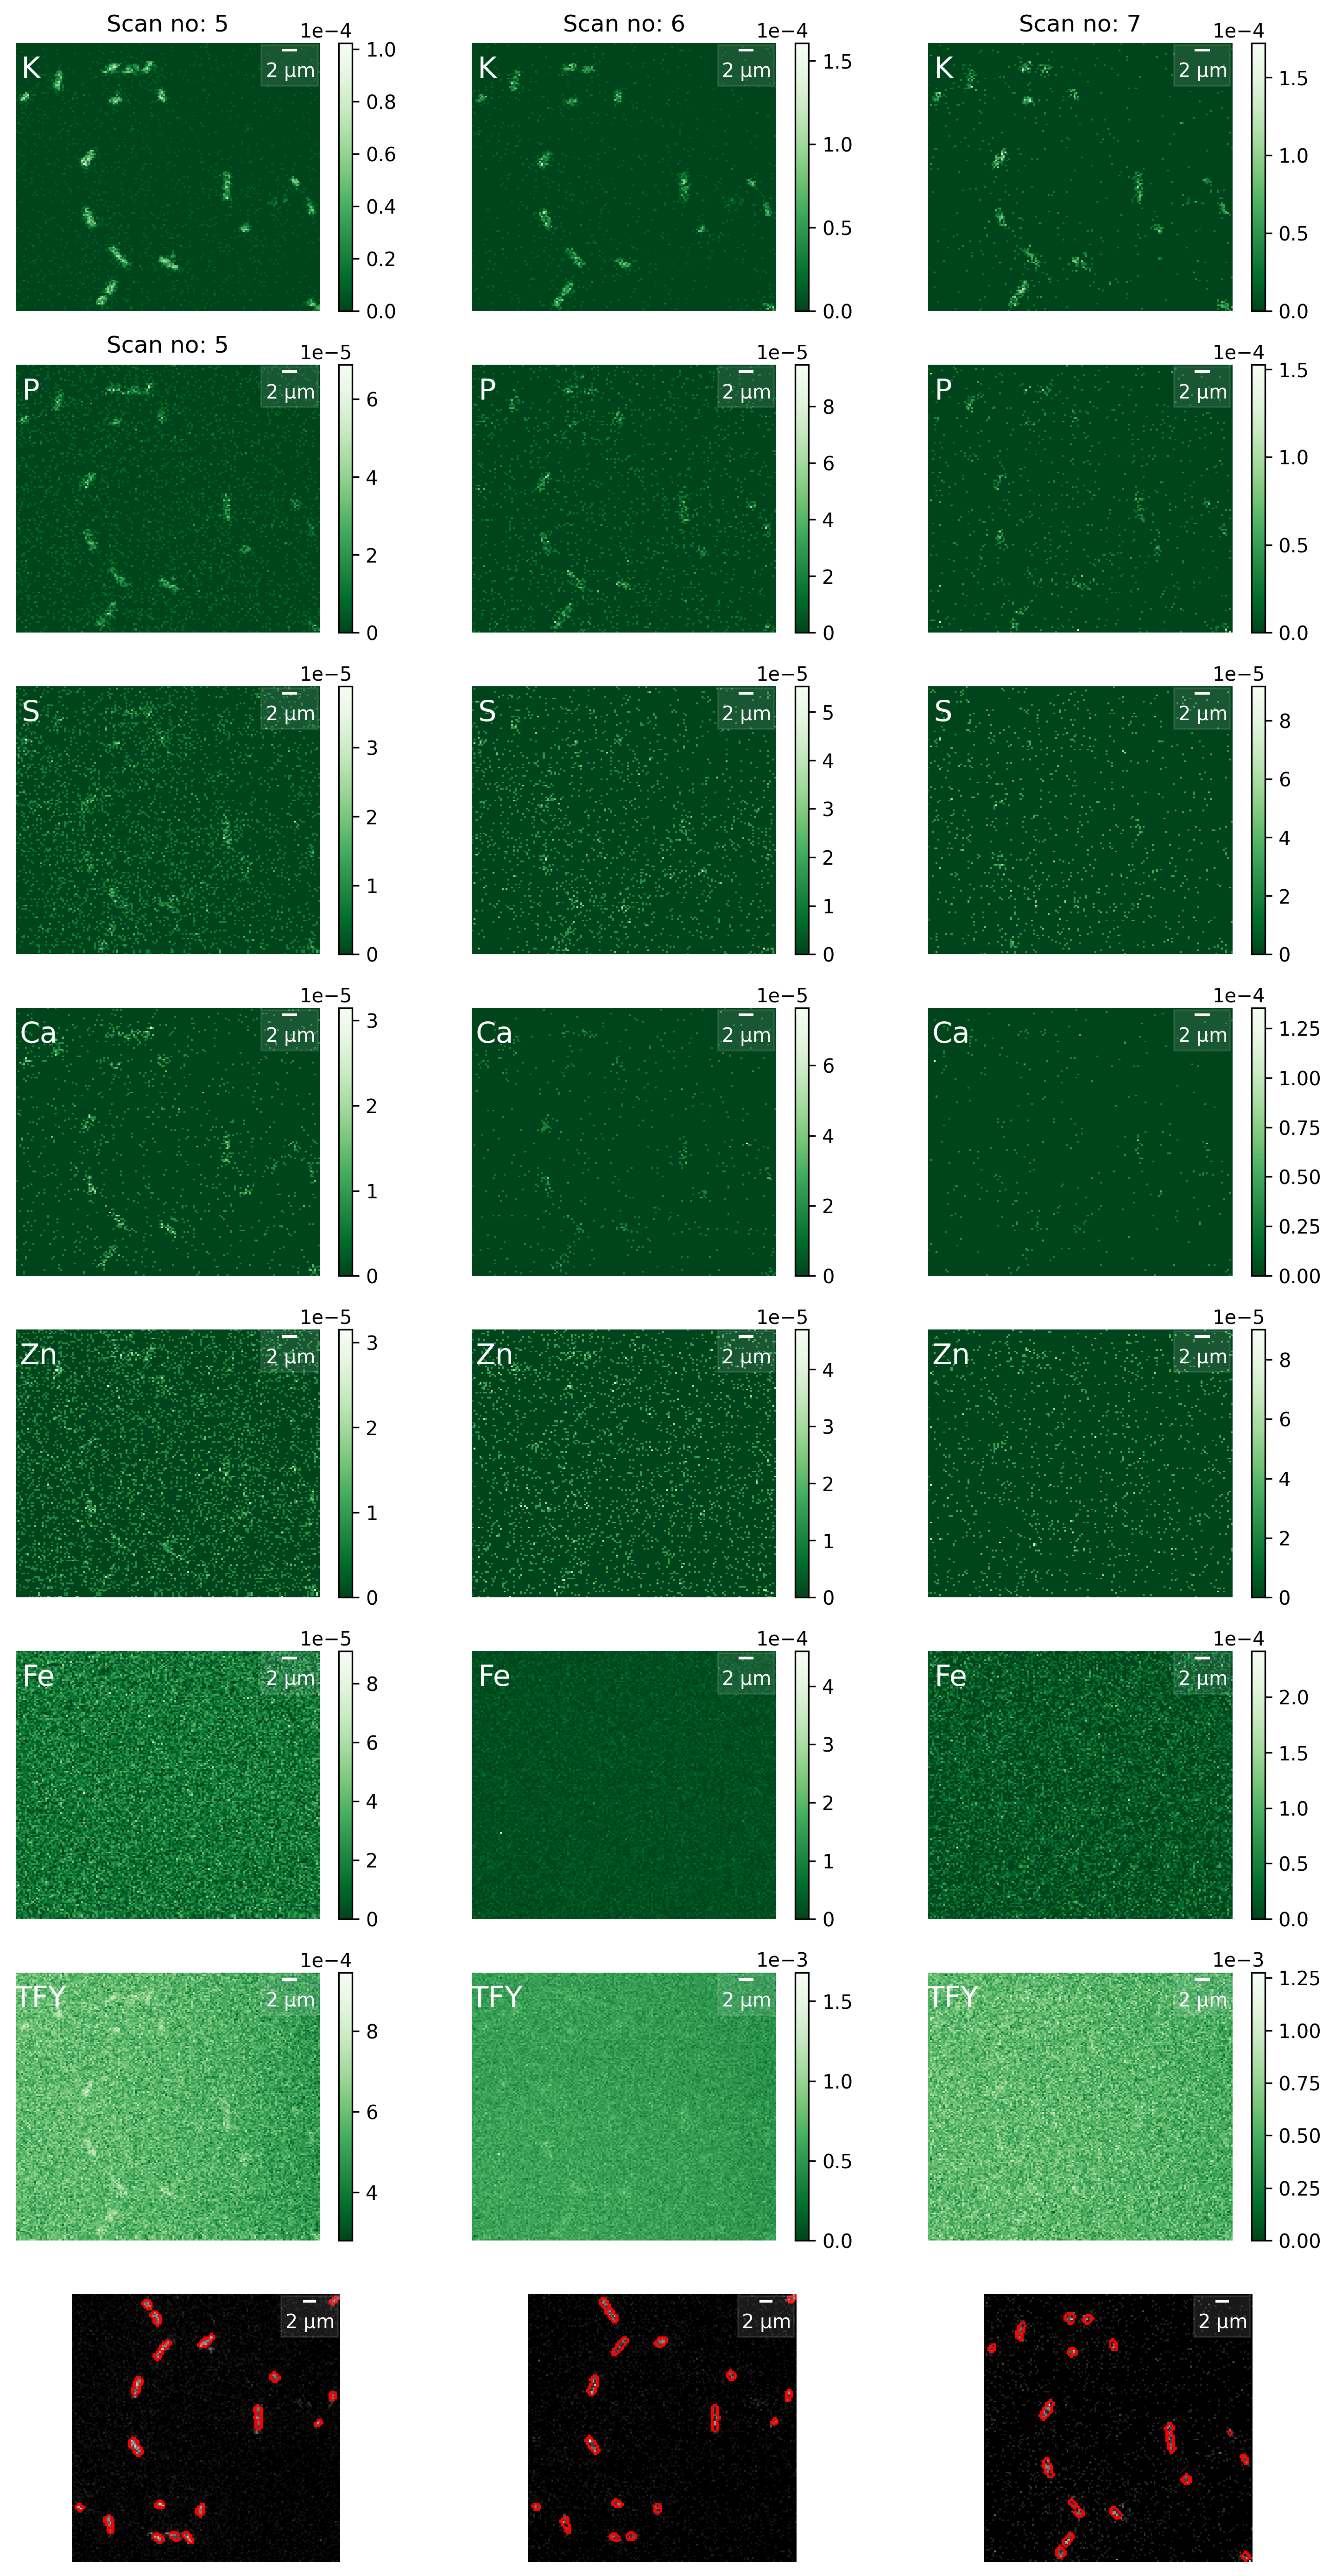

In [18]:
scan_idx = 5
fig, axs = plt.subplots(8, 3, figsize=(12,24), dpi=300)
CMAPS = ['Greens_r']

# K row

ax = axs[0, 0]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_K[scan_idx], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.05, 0.90, 'K', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.set_title('Scan no: '+ str(scan_idx))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[0, 1]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_K[scan_idx+1], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.05, 0.90, 'K', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.set_title('Scan no: '+ str(scan_idx+1))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))

ax = axs[0, 2]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_K[scan_idx+2], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+2], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.05, 0.90, 'K', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.set_title('Scan no: '+ str(scan_idx+2))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


# P row

ax = axs[1, 0]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_P[scan_idx], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.05, 0.90, 'P', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.set_title('Scan no: '+ str(scan_idx))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[1, 1]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_P[scan_idx+1], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.05, 0.90, 'P', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+1))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[1, 2]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_P[scan_idx+2], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+2], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.05, 0.90, 'P', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+2))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))

# S row

ax = axs[2, 0]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_S[scan_idx], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.05, 0.90, 'S', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[2, 1]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_S[scan_idx+1], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.05, 0.90, 'S', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+1))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[2, 2]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_S[scan_idx+2], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+2], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.05, 0.90, 'S', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+2))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))

# Ca row

ax = axs[3, 0]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_Ca[scan_idx], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.075, 0.90, 'Ca', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[3, 1]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_Ca[scan_idx+1], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.075, 0.90, 'Ca', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+1))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[3, 2]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_Ca[scan_idx+2], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+2], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.075, 0.90, 'Ca', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+2))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))

# Zn row

ax = axs[4, 0]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_Zn[scan_idx], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.075, 0.90, 'Zn', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[4, 1]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_Zn[scan_idx+1], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.075, 0.90, 'Zn', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+1))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[4, 2]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_Zn[scan_idx+2], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+2], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.075, 0.90, 'Zn', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+2))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


# Fe row

ax = axs[5, 0]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_Fe[scan_idx], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.075, 0.90, 'Fe', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[5, 1]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_Fe[scan_idx+1], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.075, 0.90, 'Fe', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+1))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[5, 2]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_Fe[scan_idx+2], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+2], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.075, 0.90, 'Fe', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+2))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


# TFY row

ax = axs[6, 0]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_TFY[scan_idx], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.080, 0.90, 'TFY', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[6, 1]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_TFY[scan_idx+1], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.080, 0.90, 'TFY', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+1))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[6, 2]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_TFY[scan_idx+2], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+2], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.080, 0.90, 'TFY', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+2))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


# binary overlay row

ax = axs[7, 0]
ax.axis('off')
pcm = ax.imshow(binary_overlay(scan_idx))
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
# ax.text(0.080, 0.90, 'mask', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx))
# fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))
plt.gca().invert_yaxis()

ax = axs[7, 1]
ax.axis('off')
pcm = ax.imshow(binary_overlay(scan_idx+1))
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
# ax.text(0.080, 0.90, 'mask', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+1))
# fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))
plt.gca().invert_yaxis()

ax = axs[7, 2]
ax.axis('off')
pcm = ax.imshow(binary_overlay(scan_idx+2))
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+2], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
# ax.text(0.080, 0.90, 'mask', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+2))
# fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))
plt.gca().invert_yaxis()

plt.show()


In [22]:
binary_overlay(5).shape

(163, 163, 3)

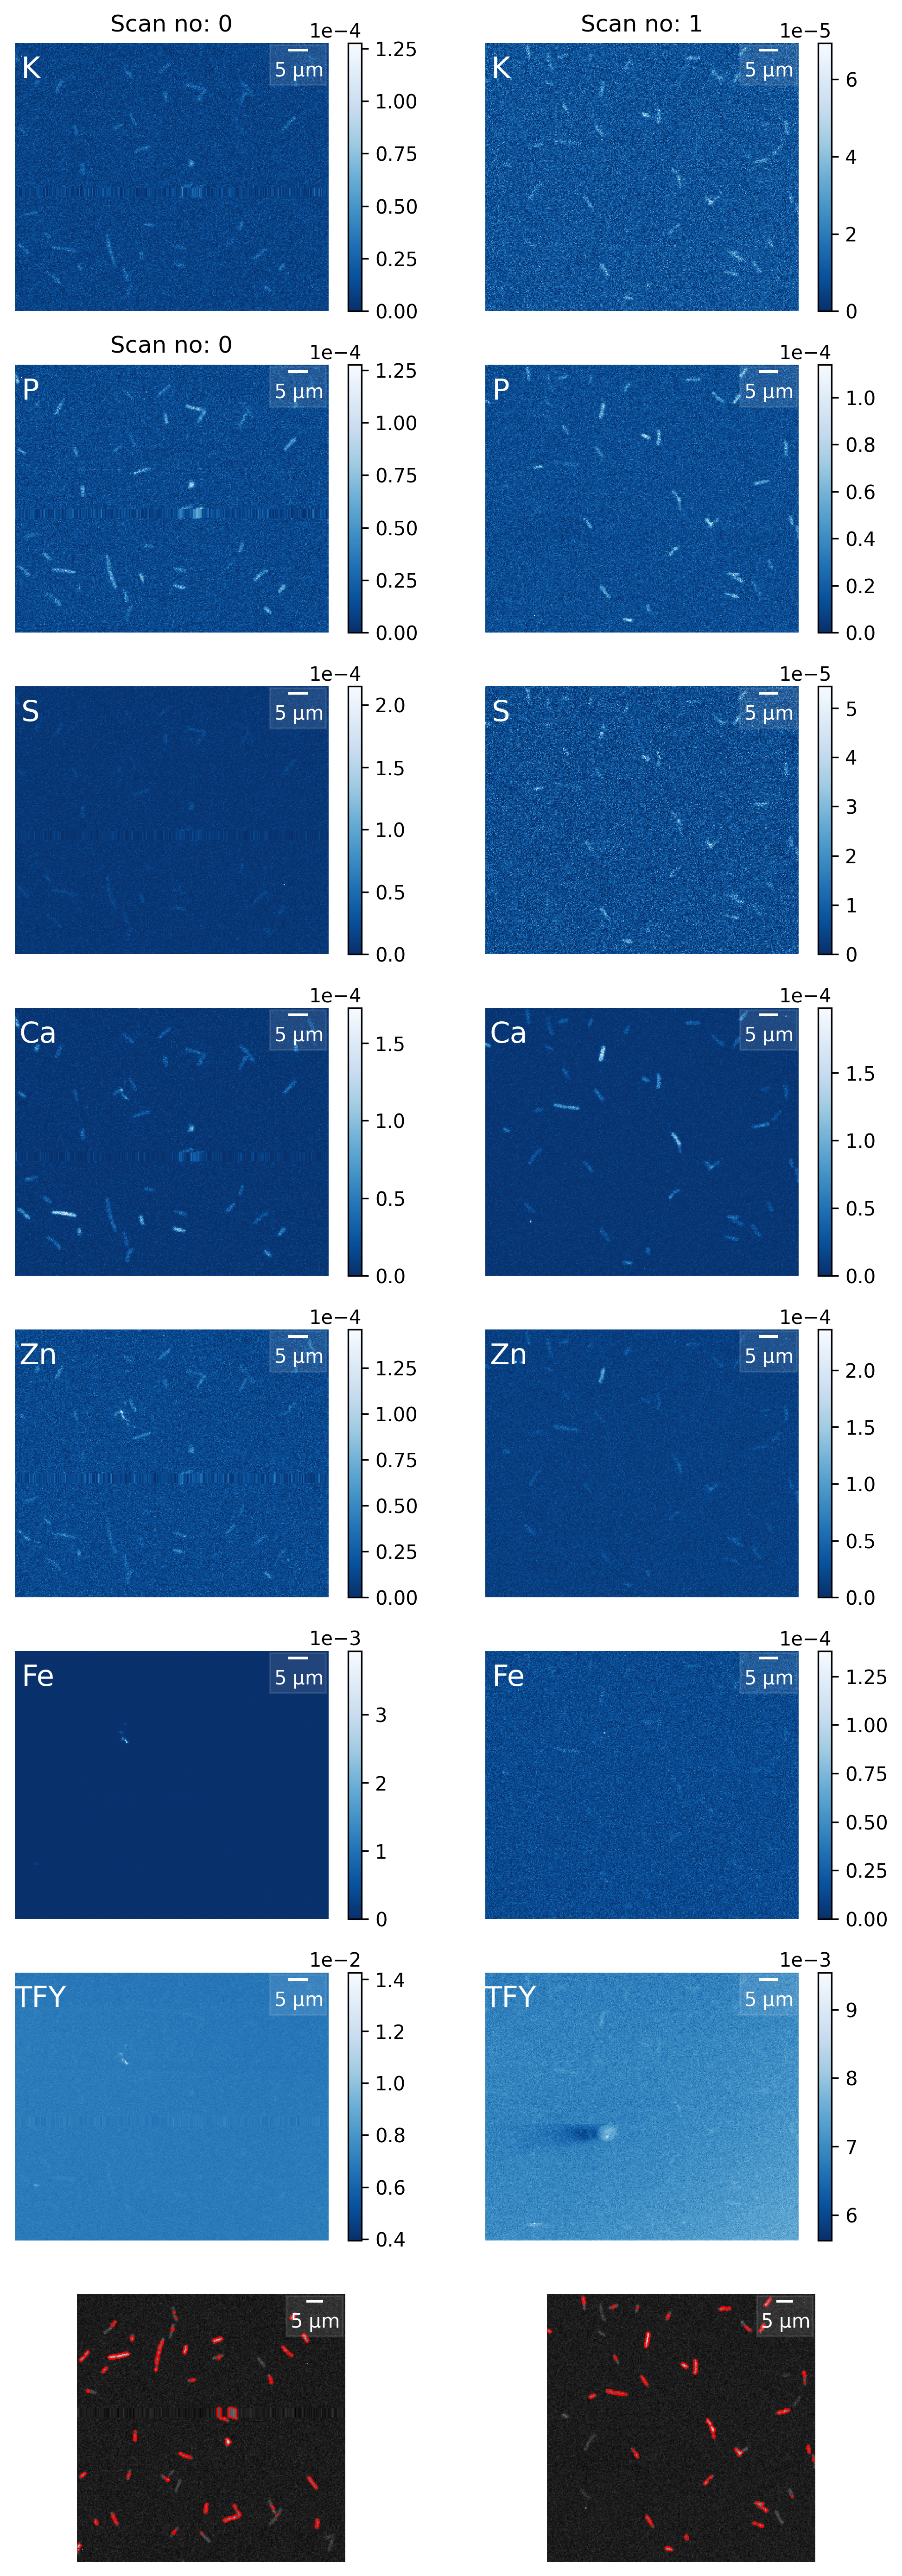

In [26]:
scan_idx = 0
fig, axs = plt.subplots(8, 2, figsize=(8,24), dpi=300)
CMAPS = ['Blues_r']

# K row

ax = axs[0, 0]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_K[scan_idx], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.05, 0.90, 'K', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.set_title('Scan no: '+ str(scan_idx))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[0, 1]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_K[scan_idx+1], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.05, 0.90, 'K', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.set_title('Scan no: '+ str(scan_idx+1))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))



# P row

ax = axs[1, 0]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_P[scan_idx], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.05, 0.90, 'P', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.set_title('Scan no: '+ str(scan_idx))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[1, 1]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_P[scan_idx+1], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.05, 0.90, 'P', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+1))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


# S row

ax = axs[2, 0]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_S[scan_idx], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.05, 0.90, 'S', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[2, 1]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_S[scan_idx+1], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.05, 0.90, 'S', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+1))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))



# Ca row

ax = axs[3, 0]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_Ca[scan_idx], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.075, 0.90, 'Ca', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[3, 1]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_Ca[scan_idx+1], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.075, 0.90, 'Ca', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+1))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))



# Zn row

ax = axs[4, 0]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_Zn[scan_idx], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.075, 0.90, 'Zn', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[4, 1]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_Zn[scan_idx+1], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.075, 0.90, 'Zn', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+1))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))




# Fe row

ax = axs[5, 0]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_Fe[scan_idx], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.075, 0.90, 'Fe', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[5, 1]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_Fe[scan_idx+1], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.075, 0.90, 'Fe', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+1))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))




# TFY row

ax = axs[6, 0]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_TFY[scan_idx], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.080, 0.90, 'TFY', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[6, 1]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_TFY[scan_idx+1], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.080, 0.90, 'TFY', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+1))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))




# binary overlay row

ax = axs[7, 0]
ax.axis('off')
pcm = ax.imshow(binary_overlay(scan_idx))
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
# ax.text(0.080, 0.90, 'mask', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx))
# fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))
plt.gca().invert_yaxis()

ax = axs[7, 1]
ax.axis('off')
pcm = ax.imshow(binary_overlay(scan_idx+1))
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
# ax.text(0.080, 0.90, 'mask', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+1))
# fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))
plt.gca().invert_yaxis()


plt.show()


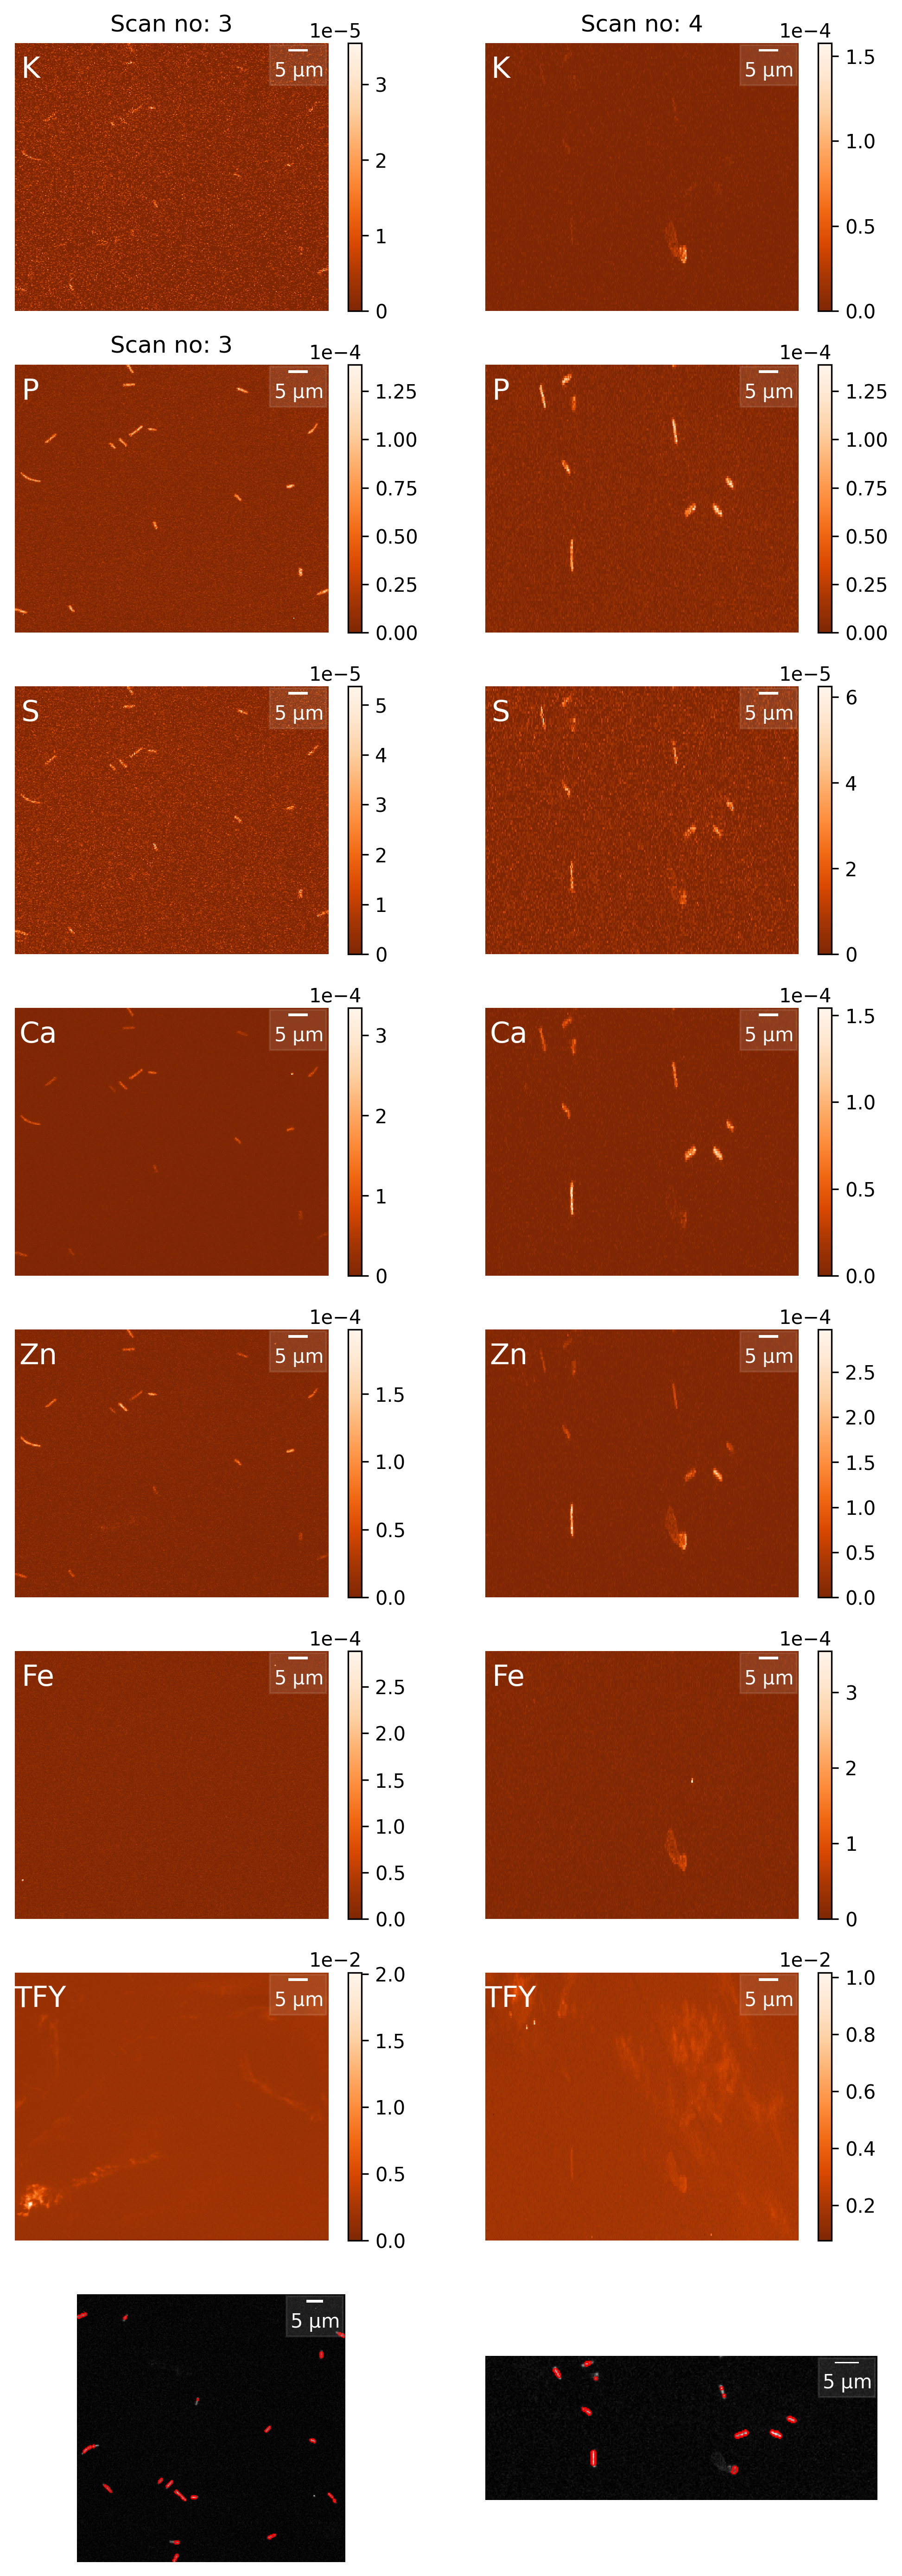

In [28]:
# pick scan 4 from here
scan_idx = 3
fig, axs = plt.subplots(8, 2, figsize=(8,24), dpi=300)
CMAPS = ['Oranges_r']

# K row

ax = axs[0, 0]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_K[scan_idx], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.05, 0.90, 'K', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.set_title('Scan no: '+ str(scan_idx))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[0, 1]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_K[scan_idx+1], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.05, 0.90, 'K', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.set_title('Scan no: '+ str(scan_idx+1))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))



# P row

ax = axs[1, 0]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_P[scan_idx], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.05, 0.90, 'P', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.set_title('Scan no: '+ str(scan_idx))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[1, 1]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_P[scan_idx+1], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.05, 0.90, 'P', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+1))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


# S row

ax = axs[2, 0]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_S[scan_idx], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.05, 0.90, 'S', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[2, 1]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_S[scan_idx+1], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.05, 0.90, 'S', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+1))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))



# Ca row

ax = axs[3, 0]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_Ca[scan_idx], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.075, 0.90, 'Ca', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[3, 1]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_Ca[scan_idx+1], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.075, 0.90, 'Ca', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+1))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))



# Zn row

ax = axs[4, 0]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_Zn[scan_idx], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.075, 0.90, 'Zn', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[4, 1]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_Zn[scan_idx+1], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.075, 0.90, 'Zn', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+1))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))




# Fe row

ax = axs[5, 0]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_Fe[scan_idx], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.075, 0.90, 'Fe', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[5, 1]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_Fe[scan_idx+1], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.075, 0.90, 'Fe', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+1))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))




# TFY row

ax = axs[6, 0]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_TFY[scan_idx], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.080, 0.90, 'TFY', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))


ax = axs[6, 1]
ax.axis('off')
pcm = ax.pcolormesh(coarse_scans.X_d_TFY[scan_idx+1], cmap = CMAPS[0])
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
ax.text(0.080, 0.90, 'TFY', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+1))
fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))




# binary overlay row

ax = axs[7, 0]
ax.axis('off')
pcm = ax.imshow(binary_overlay(scan_idx))
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
# ax.text(0.080, 0.90, 'mask', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx))
# fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))
plt.gca().invert_yaxis()

ax = axs[7, 1]
ax.axis('off')
pcm = ax.imshow(binary_overlay(scan_idx+1))
ax.add_artist(ScaleBar(coarse_scans.X_x_res[scan_idx+1], units = "um", color='white', length_fraction=0.1, box_alpha=0.10))
# ax.text(0.080, 0.90, 'mask', fontsize=15, color ='white', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# ax.set_title('Scan no: '+ str(scan_idx+1))
# fig.colorbar(pcm, ax=ax).ax.ticklabel_format(style='sci', scilimits=(-2,2))
plt.gca().invert_yaxis()


plt.show()
